# Predicting Attractiveness

### Can we predict whether someone is attractive without seeing them? Does it differ for males vs females?

The popularity of Tinder and importance of photos on dating sites is a clear indication that attractiveness plays a large part in determining who to date.  However, photos are not always available and people may not show the best or most accurate photo of themeselves.  In this project, we will use data from a Speed Dating Experiment conducted by Columbia Business School professors.  The researchers held a series of speed dating events where men and women scored their date based on attractiveness and other factors. Prior to the event, each person completed a questionaire which revealed their demographic information, their attitude towards the event, their interests, their self perception and other data.

Here, we will explore the pre-event data to try to predict one's attractiveness score as judged by the opposite sex during the speed dating event.

Data Source: https://www.kaggle.com/annavictoria/speed-dating-experiment

# Exploratory Data Analysis

## Clean and analyze your data set.
Exploratory data analysis is a crucial step in the data workflow. Create a Jupyter Notebook that explores your data both mathematically and visually. You should explore features, apply descriptive statistics, look at distributions, and determine how to handle sampling or any missing values.

## Requirements

Create an exploratory data analysis notebook.
Include statistical analysis and EDA visualizations.
Determine how to handle sampling or missing values.
Submit or share EDA notebook as per your instructor's directions.


In [2]:
# Load Pandas into Python
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
 
%matplotlib inline

In [24]:
# Read data
data = pd.read_csv('Speed Dating Data.csv')
print data.shape
data.columns[:100]

(8378, 195)


Index([u'iid', u'id', u'gender', u'idg', u'condtn', u'wave', u'round',
       u'position', u'positin1', u'order', u'partner', u'pid', u'match',
       u'int_corr', u'samerace', u'age_o', u'race_o', u'pf_o_att', u'pf_o_sin',
       u'pf_o_int', u'pf_o_fun', u'pf_o_amb', u'pf_o_sha', u'dec_o', u'attr_o',
       u'sinc_o', u'intel_o', u'fun_o', u'amb_o', u'shar_o', u'like_o',
       u'prob_o', u'met_o', u'age', u'field', u'field_cd', u'undergra',
       u'mn_sat', u'tuition', u'race', u'imprace', u'imprelig', u'from',
       u'zipcode', u'income', u'goal', u'date', u'go_out', u'career',
       u'career_c', u'sports', u'tvsports', u'exercise', u'dining', u'museums',
       u'art', u'hiking', u'gaming', u'clubbing', u'reading', u'tv',
       u'theater', u'movies', u'concerts', u'music', u'shopping', u'yoga',
       u'exphappy', u'expnum', u'attr1_1', u'sinc1_1', u'intel1_1', u'fun1_1',
       u'amb1_1', u'shar1_1', u'attr4_1', u'sinc4_1', u'intel4_1', u'fun4_1',
       u'amb4_1', u'shar4_1'

In [25]:
# View rest of columns
data.columns[100:]

Index([u'intel', u'fun', u'amb', u'shar', u'like', u'prob', u'met',
       u'match_es', u'attr1_s', u'sinc1_s', u'intel1_s', u'fun1_s', u'amb1_s',
       u'shar1_s', u'attr3_s', u'sinc3_s', u'intel3_s', u'fun3_s', u'amb3_s',
       u'satis_2', u'length', u'numdat_2', u'attr7_2', u'sinc7_2', u'intel7_2',
       u'fun7_2', u'amb7_2', u'shar7_2', u'attr1_2', u'sinc1_2', u'intel1_2',
       u'fun1_2', u'amb1_2', u'shar1_2', u'attr4_2', u'sinc4_2', u'intel4_2',
       u'fun4_2', u'amb4_2', u'shar4_2', u'attr2_2', u'sinc2_2', u'intel2_2',
       u'fun2_2', u'amb2_2', u'shar2_2', u'attr3_2', u'sinc3_2', u'intel3_2',
       u'fun3_2', u'amb3_2', u'attr5_2', u'sinc5_2', u'intel5_2', u'fun5_2',
       u'amb5_2', u'you_call', u'them_cal', u'date_3', u'numdat_3',
       u'num_in_3', u'attr1_3', u'sinc1_3', u'intel1_3', u'fun1_3', u'amb1_3',
       u'shar1_3', u'attr7_3', u'sinc7_3', u'intel7_3', u'fun7_3', u'amb7_3',
       u'shar7_3', u'attr4_3', u'sinc4_3', u'intel4_3', u'fun4_3', u'amb4_3',
   

In [51]:
# Extract Columns of interest
ident = [u'iid']
personal = [u'gender', u'age', u'field_cd', u'career_c']
attitude = [u'goal', u'exphappy']
self_perception = [u'attr3_1', u'sinc3_1', u'fun3_1', u'intel3_1', u'amb3_1']
behaviors = [u'date', u'go_out']
interests = [u'sports', u'tvsports', u'exercise', u'dining', u'museums',
       u'art', u'hiking', u'gaming', u'clubbing', u'reading', u'tv',
       u'theater', u'movies', u'concerts', u'music', u'shopping', u'yoga']
pred = ['attr_o']

# Omitting interests to simplify
columns = ident + personal + pred + attitude + self_perception + behaviors
data = data[columns]
print data.head().T
print data.tail().T
print data.shape
print data.describe().T

            30    31    32    33    34
iid        4.0   4.0   4.0   4.0   4.0
gender     0.0   0.0   0.0   0.0   0.0
age       23.0  23.0  23.0  23.0  23.0
field_cd   1.0   1.0   1.0   1.0   1.0
career_c   1.0   1.0   1.0   1.0   1.0
attr_o     6.0   6.0  10.0   7.0   8.0
goal       1.0   1.0   1.0   1.0   1.0
exphappy   1.0   1.0   1.0   1.0   1.0
attr3_1    7.0   7.0   7.0   7.0   7.0
sinc3_1    8.0   8.0   8.0   8.0   8.0
fun3_1     9.0   9.0   9.0   9.0   9.0
intel3_1   7.0   7.0   7.0   7.0   7.0
amb3_1     8.0   8.0   8.0   8.0   8.0
date       5.0   5.0   5.0   5.0   5.0
go_out     1.0   1.0   1.0   1.0   1.0
           8373   8374   8375   8376   8377
iid       552.0  552.0  552.0  552.0  552.0
gender      1.0    1.0    1.0    1.0    1.0
age        25.0   25.0   25.0   25.0   25.0
field_cd   18.0   18.0   18.0   18.0   18.0
career_c   15.0   15.0   15.0   15.0   15.0
attr_o     10.0    6.0    2.0    5.0    8.0
goal        1.0    1.0    1.0    1.0    1.0
exphappy   10.0   10.0  

### There are 14 features.  Each row is a "date."  Most of the data is ordinal (scale 1 to 10). Gender is coded 0 female, 1 male. Field and Career are categorical, coded as a number.

In [52]:
# Check nulls
print data.groupby(['iid']).max().isnull().sum().sort_values(ascending=False)

go_out      0
date        0
amb3_1      0
intel3_1    0
fun3_1      0
sinc3_1     0
attr3_1     0
exphappy    0
goal        0
attr_o      0
career_c    0
field_cd    0
age         0
gender      0
dtype: int64


In [53]:
# Just drop rows that have any nulls
data.dropna(how='any', inplace=True);

### We will need to group by user iid.  Most data will be consistent for all iid, but attr_o needs compressed. We will use the mode as concensus of what others thought about a subject's attractiveness.

In [61]:
#How many participants? How many dates did each one have?
print "There are", len(data.iid.unique()), "unique participants.\n"
print "With between", data.iid.value_counts().min(), "and", data.iid.value_counts().max(), "dates each."
data.groupby(['iid'])['gender'].mean().value_counts()
# Female =0 Male 1
# 271 Males, 263 Females after cleaning data


There are 534 unique participants.

With between 5 and 22 dates each.


1    271
0    263
Name: gender, dtype: int64

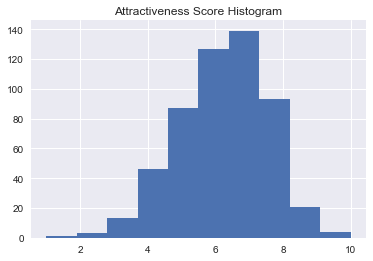

In [54]:
# Take most popular attr score for each subject
df = data.groupby('iid').agg(lambda x:x.value_counts().index[0])
ax = df.attr_o.hist();
plt.title('Attractiveness Score Histogram')

In [55]:
# Look at stats on data grouped by iid
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,534.0,0.507491,0.500413,0.0,0.0,1.0,1.0,1.0
age,534.0,26.389513,3.776838,18.0,24.0,26.0,28.0,55.0
field_cd,534.0,7.584270,3.754599,1.0,5.0,8.0,10.0,18.0
career_c,534.0,5.241573,3.322513,1.0,2.0,6.0,7.0,17.0
attr_o,534.0,6.316479,1.482553,1.0,5.0,6.0,7.0,10.0
goal,534.0,2.132959,1.429756,1.0,1.0,2.0,2.0,6.0
exphappy,534.0,5.526217,1.716892,1.0,5.0,6.0,7.0,10.0
attr3_1,534.0,7.099251,1.387251,2.0,6.0,7.0,8.0,10.0
sinc3_1,534.0,8.286517,1.412330,2.0,8.0,8.0,9.0,10.0
fun3_1,534.0,7.694757,1.555264,2.0,7.0,8.0,9.0,10.0


## Let's Look at Pairplots and Heatmaps of Correlation

#### Personal Data

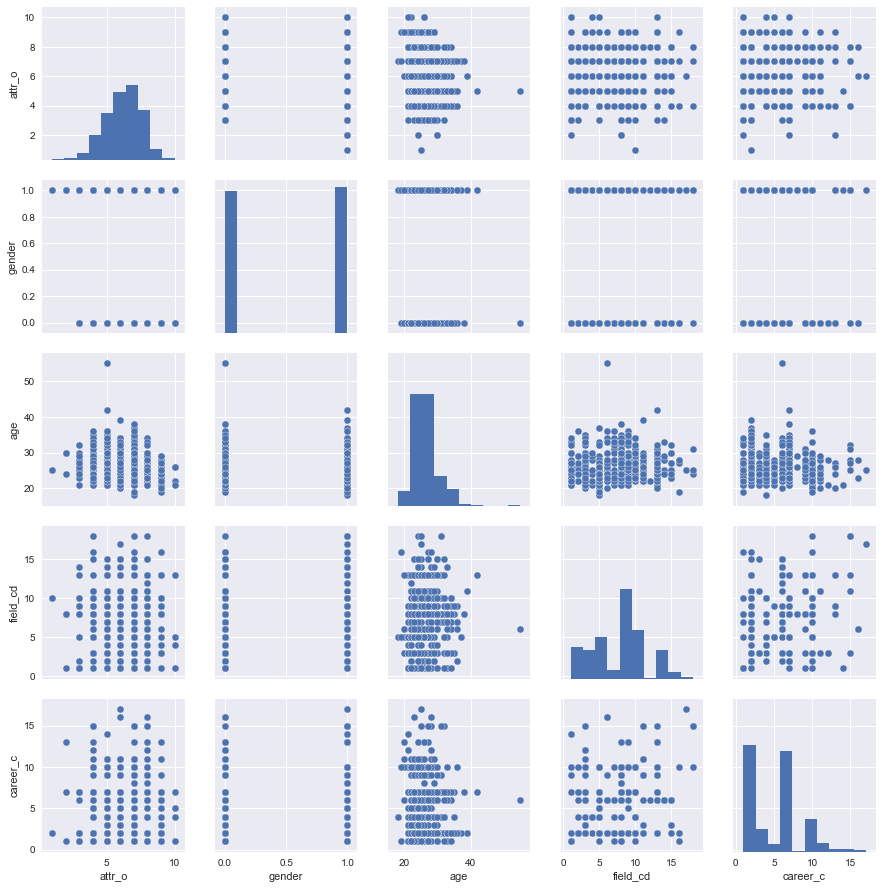

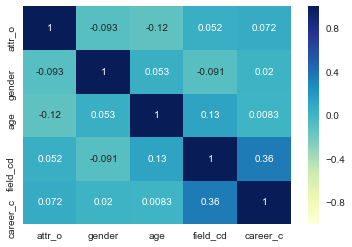

In [56]:
def printplots(df, fields):
    plt.figsize=(15,9)
    sns.pairplot(df[fields]);
    plt.figure()
    sns.heatmap(df[fields].corr(), annot=True, cmap="YlGnBu");
printplots(df, pred + personal)

#### Conclusions:
Age, Career, and Field may be skewed toward a small set. None appear to be correlated with attr_o

#### Attitude

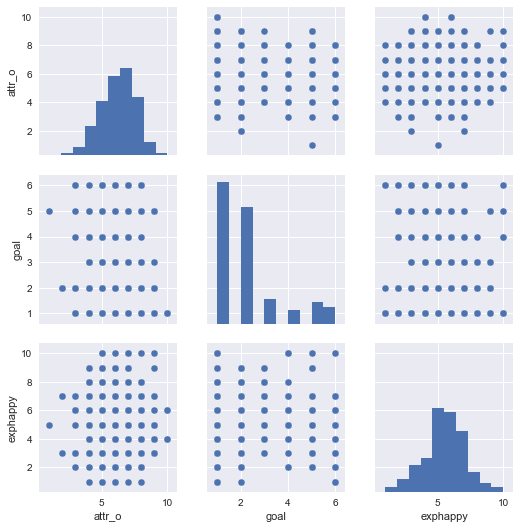

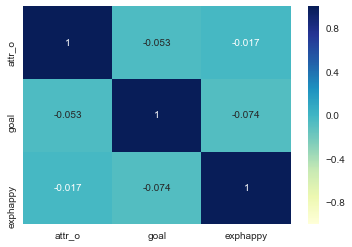

In [57]:
printplots(df, pred + attitude)

#### Conclusions:
Goal seems to be skewed toward a small set. None appear to be correlated with attr_o

#### Self Perception

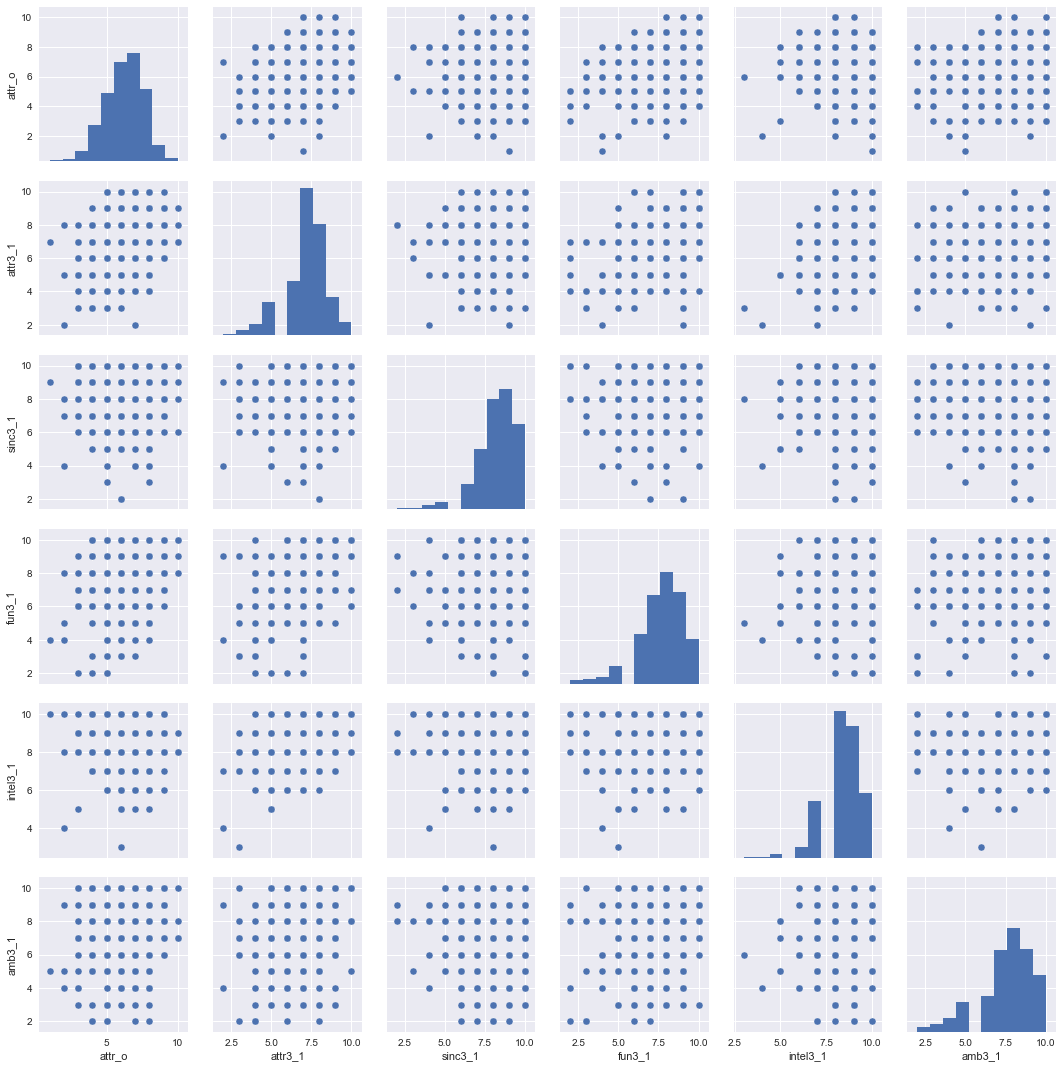

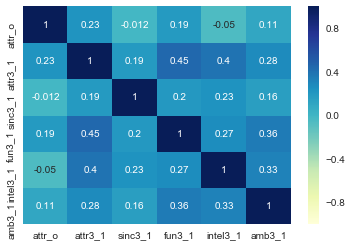

In [58]:
printplots(df, pred + self_perception)

#### Conclusions:
Self perception of attr and fun, attr3_1 and fun3_1, may have slight correlation with attr_o

#### Behaviors

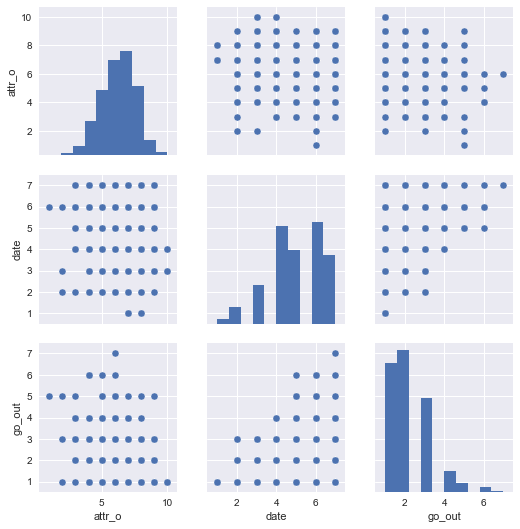

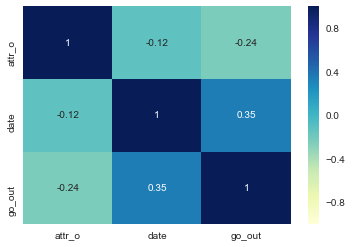

In [59]:
printplots(df, pred + behaviors)

#### Conclusions:
Date and go_out seem to be skewed toward a small set. None appear to be correlated with attr_o. date and go out seem to be slightly correlated with each other

## Conclusions About Data

In [84]:
# attr_o percentage 
print df.attr_o.value_counts()/df.attr_o.count()

7.0     0.260300
6.0     0.237828
8.0     0.174157
5.0     0.162921
4.0     0.086142
9.0     0.039326
3.0     0.024345
10.0    0.007491
2.0     0.005618
1.0     0.001873
Name: attr_o, dtype: float64


## attr3_1 and fun3_1 might be good features for prediction

